In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [7]:
folder = 'dataset_analysis_newslopes_3Gen'
dfs = glob.glob(os.path.join(folder, '**/*.pkl'), recursive=True)


['dataset_analysis_newslopes_3Gen/Braille/data/Braille_plot_dict.pkl', 'dataset_analysis_newslopes_3Gen/MNIST/data/MNIST_plot_dict.pkl', 'dataset_analysis_newslopes_3Gen/MNIST_compressed/data/MNIST_compressed_plot_dict.pkl']


In [11]:
dfs = [pd.read_pickle(df) for df in dfs]
df = pd.concat(dfs)


,center,span,accuracy,data_type,dataset,sim_id
0,0.5,0.5,0.046274,amplitude,Braille,0
1,0.5,0.5,0.039183,amplitude,Braille,0
2,0.5,0.5,0.044591,amplitude,Braille,0
3,0.5,0.5,0.039062,amplitude,Braille,0
4,0.5,0.5,0.043990,amplitude,Braille,0
...,...,...,...,...,...,...
95,5.0,1.0,0.123750,slope,MNIST_compressed,299
96,5.0,1.0,0.123750,slope,MNIST_compressed,299
97,5.0,1.0,0.123750,slope,MNIST_compressed,299
98,5.0,1.0,0.123750,slope,MNIST_compressed,299


In [13]:
grouped_df = df.groupby(['center', 'span','data_type','dataset']).mean().reset_index()
grouped_df


,center,span,data_type,dataset,accuracy,sim_id
0,0.5,0.5,amplitude,Braille,0.085151,0.0
1,0.5,0.5,amplitude,MNIST,0.133406,0.0
2,0.5,0.5,amplitude,MNIST_compressed,0.123269,0.0
3,0.5,0.5,slope,Braille,0.118155,2.0
4,0.5,0.5,slope,MNIST,0.111219,2.0
...,...,...,...,...,...,...
895,50.0,9.0,frequency,MNIST,0.111713,268.0
896,50.0,9.0,frequency,MNIST_compressed,0.115856,268.0
897,50.0,10.0,frequency,Braille,0.058764,298.0
898,50.0,10.0,frequency,MNIST,0.111275,298.0


In [36]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        v_ext = np.max( [ np.abs(self.vmin), np.abs(self.vmax) ] )
        x, y = [-v_ext, self.midpoint, v_ext], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

Braille amplitude
Braille slope
MNIST amplitude
MNIST slope
MNIST_compressed amplitude
MNIST_compressed slope


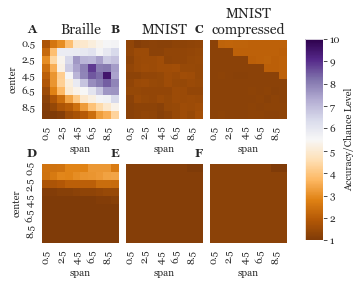

In [93]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14
plt.rc('font', family='georgia', size=SMALL_SIZE)
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig1,axis1 = plt.subplots(2,3,figsize=(5,4),sharey=True)
grouped_df = df.groupby(['center', 'span','data_type','dataset']).mean().reset_index()
chance_level = {'Braille':1/21,'MNIST':1/10,'MNIST_compressed':1/10}
for d_idx,dataset in enumerate(grouped_df['dataset'].unique()):
    for t, data_type in enumerate(['amplitude','slope']):
        print(dataset, data_type)
        # which_decimal_c = np.max(
        # [len(str(int(0.99 / (centers[data_type][1] - centers[data_type][0])))),
        #  len(str(int(0.99 / (centers[data_type][0]))))])
        # which_decimal_s = np.max(
        # [len(str(int(0.99 / (spans[data_type][1] - spans[data_type][0])))),
        #  len(str(int(0.99 / (spans[data_type][0]))))])
        selected_df = grouped_df[grouped_df['dataset']==dataset]
        selected_df = selected_df[selected_df['data_type']==data_type]
        plot_dict_hm = selected_df.pivot(index="center", columns="span", values="accuracy")/chance_level[dataset]
        plot_dict_hm_np = np.array(plot_dict_hm)
        norm = MidpointNormalize(midpoint=1, vmin=0, vmax=20)
        heatmap = sns.heatmap(plot_dict_hm,ax=axis1[t,d_idx],cbar=False,vmin=1,vmax=10,cmap='PuOr')
        im = heatmap.get_children()[0]
        if dataset == 'MNIST_compressed':
            axis1[t,d_idx].set_title('MNIST\ncompressed')
        else:
            axis1[t,d_idx].set_title(dataset)
        centers = list(heatmap.get_xticks())
        spans = list(heatmap.get_yticks())
        which_decimal_c = np.max(
        [len(str(int(0.99 / (centers[1] - centers[0])))),
         len(str(int(0.99 / (centers[0]))))])
        which_decimal_s = np.max(
        [len(str(int(0.99 / (spans[1] - spans[0])))),
         len(str(int(0.99 / (spans[0]))))])
        axis1[t,d_idx].set_xticklabels([str(round(c,which_decimal_c)) for c in centers])
        axis1[t,d_idx].set_yticklabels([str(round(s,which_decimal_s)) for s in spans])
        if t == 1:
            axis1[t,d_idx].set_title(None)
        # axis1[d_idx].set_xticks(heatmap.get_xticks())
        # axis1[d_idx].set_yticks(heatmap.get_yticks())
        if d_idx > 0:
            axis1[t,d_idx].set_ylabel('')
        # if t == 0:
            # axis1[t,d_idx].set_xlabel('')
            
        # axis1[d_idx].set_xlabel('')
        # axis1[d_idx].set_ylabel('')
    # selected_df = grouped_df[grouped_df['dataset']==dataset]
    # plot_dict_hm = selected_df.pivot(index="center", columns="span", values="accuracy")
    # sns.heatmap(plot_dict_hm,ax=axis1[d_idx],annot=True,fmt='.2f',cmap='Blues',cbar=False)
## add colorbar
plt.tight_layout()
# put letters at every subplot
for i, ax in enumerate(fig1.axes):
    ax.text(-0.2, 1.1, chr(65+i), transform=ax.transAxes, 
            size=12, weight='bold')
fig1.subplots_adjust(right=0.8)
cbar_ax = fig1.add_axes([0.85, 0.16, 0.05, 0.7])  
fig1.colorbar(im, cax=cbar_ax)
# add label to colorbar
cbar_ax.set_ylabel('Accuracy/Chance Level')
fig1.savefig('heatmap.png',dpi=300,)

In [56]:
print(heatmap.get_yticks())

[0.5 2.5 4.5 6.5 8.5]


In [81]:
grouped_df

,center,span,data_type,dataset,accuracy,sim_id
0,0.5,0.5,amplitude,Braille,0.085151,0.0
1,0.5,0.5,amplitude,MNIST,0.133406,0.0
2,0.5,0.5,amplitude,MNIST_compressed,0.123269,0.0
3,0.5,0.5,slope,Braille,0.118155,2.0
4,0.5,0.5,slope,MNIST,0.111219,2.0
...,...,...,...,...,...,...
895,50.0,9.0,frequency,MNIST,0.111713,268.0
896,50.0,9.0,frequency,MNIST_compressed,0.115856,268.0
897,50.0,10.0,frequency,Braille,0.058764,298.0
898,50.0,10.0,frequency,MNIST,0.111275,298.0
